<a href="https://colab.research.google.com/github/Seenuprime/Pneumonia_detector/blob/main/Model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
import pandas as pd
import numpy as np

In [ ]:
dir = zipfile.ZipFile('chest-xray-pneumonia.zip')
dir.extractall()
dir.close()

In [ ]:
import os
files = os.listdir('chest_xray')
files

['test', 'train', '__MACOSX', 'val', 'chest_xray']

In [ ]:
import pathlib
train_file = pathlib.Path('chest_xray/train')
classes = list(set(os.listdir(train_file)))
classes

['NORMAL', 'PNEUMONIA']

In [ ]:
os.path.join(files[1], classes[1])[0]

't'

In [ ]:
os.listdir("chest_xray/train/PNEUMONIA")[:10]

['person1469_bacteria_3824.jpeg',
 'person1478_bacteria_3848.jpeg',
 'person53_bacteria_252.jpeg',
 'person1361_virus_2344.jpeg',
 'person306_bacteria_1440.jpeg',
 'person651_bacteria_2543.jpeg',
 'person707_virus_1305.jpeg',
 'person1308_bacteria_3286.jpeg',
 'person1341_bacteria_3406.jpeg',
 'person419_virus_861.jpeg']

In [ ]:
os.path.join(files[1], classes[1])

'train/PNEUMONIA'

In [ ]:
train_img_path = os.path.join("chest_xray/", files[1], classes[1])
train_img_path

'chest_xray/train/PNEUMONIA'

In [ ]:
train_img_path+"/"+os.listdir(train_img_path)[0]

'chest_xray/train/PNEUMONIA/person1469_bacteria_3824.jpeg'

(-0.5, 1271.5, 711.5, -0.5)

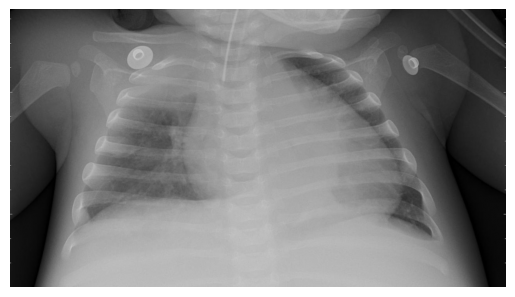

In [ ]:
import matplotlib.pyplot as plt
image = plt.imread(train_img_path+"/"+os.listdir(train_img_path)[0])
plt.imshow(image, cmap="gray")
plt.axis(False)

(-0.5, 1207.5, 863.5, -0.5)

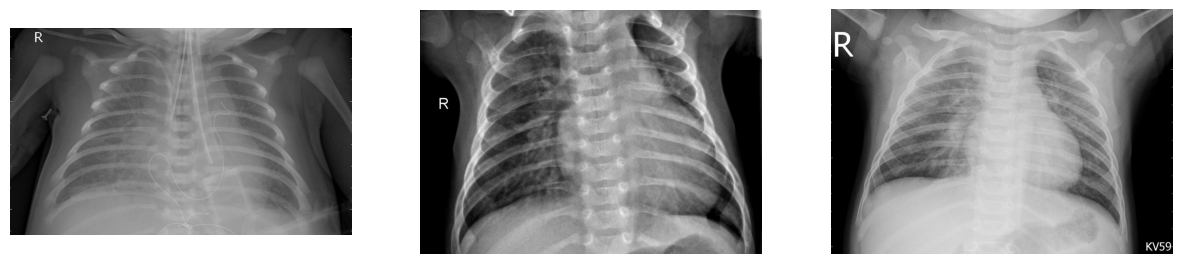

In [ ]:
import matplotlib.pyplot as plt
import random

fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[1].imshow(plt.imread(train_img_path+"/"+os.listdir(train_img_path)[random.randint(0, 100)]), cmap="gray")
ax[0].imshow(plt.imread(train_img_path+"/"+os.listdir(train_img_path)[random.randint(0, 100)]), cmap="gray")
ax[2].imshow(plt.imread(train_img_path+"/"+os.listdir(train_img_path)[random.randint(0, 100)]), cmap="gray")
ax[0].axis(False)
ax[1].axis(False)
ax[2].axis(False)

In [ ]:
import tensorflow as tf

In [ ]:
train_path = "chest_xray/train"
test_path = "chest_xray/test"
val_path = "chest_xray/val"

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                                 label_mode='int',
                                                                 color_mode="grayscale",
                                                                 image_size=(244, 244),
                                                                 seed=42)

val_data = tf.keras.preprocessing.image_dataset_from_directory(val_path,
                                                               label_mode='int',
                                                               color_mode='grayscale',
                                                               image_size=(244, 244),
                                                                 seed=42)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_path,
                                                                label_mode='int',
                                                                color_mode="grayscale",
                                                                image_size=(244, 244),
                                                                seed=42)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [ ]:
sample_image = train_data.take(1)

In [ ]:
len(sample_image), sample_image

(1,
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 244, 244, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

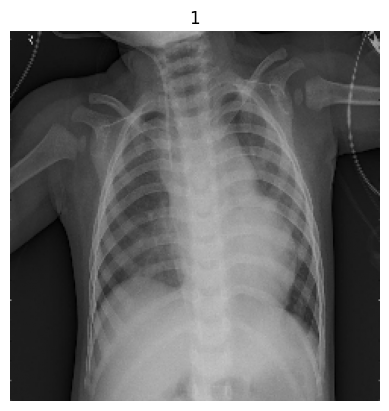

In [ ]:
for image, label in sample_image:
  rand_index = random.randint(0, 30)
  plt.imshow(image[rand_index], cmap="gray")
  plt.title(label[rand_index].numpy())
  plt.axis(False)

## Creating CNN

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("callback/modelcheckpoint.weights.h5", # Changed the filename to end with .weights.h5
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      save_freq='epoch')

In [ ]:
train = train_data.prefetch(tf.data.experimental.AUTOTUNE)
val = val_data.prefetch(tf.data.experimental.AUTOTUNE)
test = test_data.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(244, 244, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPooling2D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 242, 242, 10)        │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 121, 121, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 119, 119, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 59, 59, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 34810)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │          34,811 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,821 (139.93 KB)

 Trainable params: 35,821 (139.93 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train,
                    epochs=4,
                    validation_data=val,
                    callbacks=[model_checkpoint])

Epoch 1/4
163/163 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.8593 - loss: 2.7269 - val_accuracy: 0.8750 - val_loss: 0.3590
Epoch 2/4
163/163 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.9536 - loss: 0.1659 - val_accuracy: 0.8125 - val_loss: 0.5336
Epoch 3/4
163/163 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.9836 - loss: 0.0547 - val_accuracy: 0.9375 - val_loss: 0.4710
Epoch 4/4
163/163 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.9899 - loss: 0.0282 - val_accuracy: 0.8125 - val_loss: 0.8844


In [ ]:
model.evaluate(val_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.8125 - loss: 0.8844


[0.8843883275985718, 0.8125]

In [ ]:
preds = model.predict(test_data)

20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 489ms/step


In [ ]:
preds[:10]

array([[2.1374054e-01],
       [9.9994338e-01],
       [8.8290817e-01],
       [1.6465074e-04],
       [9.9999827e-01],
       [9.9948782e-01],
       [9.9999624e-01],
       [9.9999928e-01],
       [1.8911224e-02],
       [1.0000000e+00]], dtype=float32)

In [ ]:
model.save("model/model.keras")

In [ ]:
test = test_data.take(1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


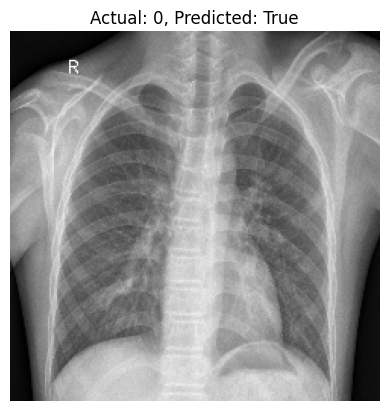

In [ ]:
for image, label in test:
  rand_index = random.randint(0, 30)
  img = image[rand_index]
  label = label[rand_index]
  img = tf.expand_dims(img, axis=0)
  pred = tf.squeeze(model.predict(img)) > 0.5
  plt.imshow(tf.squeeze(img), cmap='gray')
  plt.title(f"Actual: {label}, Predicted: {pred}")
  plt.axis(False)

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('', save_best_only=True, )

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(input_shape=(224, 224, 3), name='input_layer')

x = base_model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(train_data, test_data, epochs=10, callbacks=[model_checkpoint])